In [3]:
import numpy as np
import matplotlib.pyplot as plt

from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation, \
    OneD_SymbolicAggregateApproximation

# Load dataset

## you can use this Dataset #1

In [2]:
data = np.load('/home/user/time-series-compression/generated_datasets/gas-sensor-array-temperature-modulation.npy')
datasetName = 'gas-sensor-array-temperature-modulation (UCI)'
data.shape

(1076082, 1000)

## or this Dataset #2

In [4]:
data = np.load('/home/user/time-series-compression/generated_datasets/StarLightCurves_L500.npy')
datasetName = 'StarLightCurves (UCR archive 2018)'
data.shape

(36944, 500)

In [3]:
sample_ts = data[5]

# PAA transform (and inverse transform) of the data

In [6]:
n_paa_segments = 128
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
paa_dataset_inv = paa.inverse_transform(paa.fit_transform(data))

Text(0.5, 1.0, 'PAA')

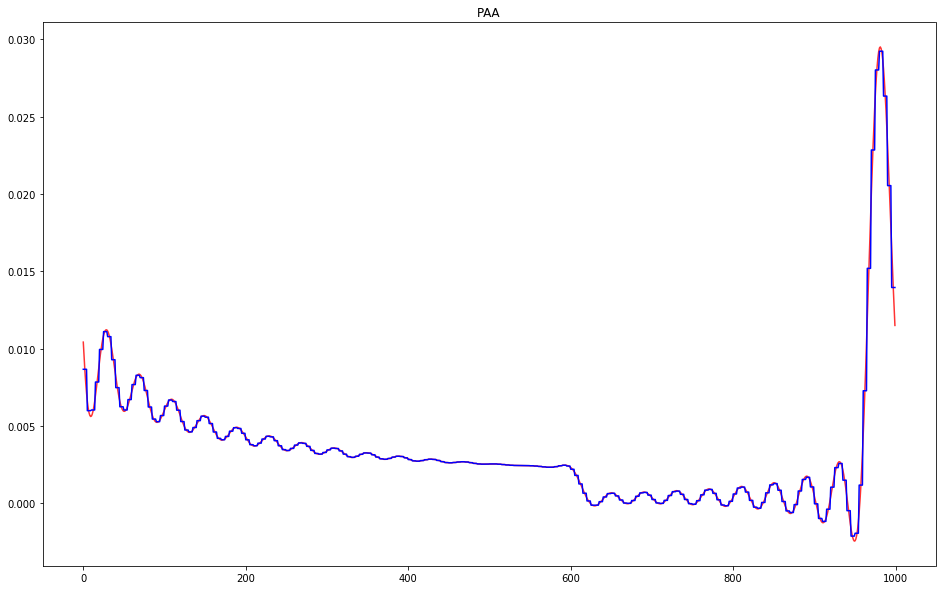

In [5]:
plt.figure(figsize=(16,10))
plt.plot(sample_ts, "r-", alpha=0.8)
plt.plot(paa_dataset_inv[0].ravel(), "b-")
plt.title("PAA")

In [6]:
len(paa.fit_transform(sample_ts)[0])

200

In [7]:
# Symmetric mean absolute percentage error
smape = 100*np.mean(np.absolute(sample_ts - paa_dataset_inv[0].ravel())/(np.absolute(paa_dataset_inv[0].ravel()) + np.absolute(sample_ts)))
print(smape)

7.834535460507372


# SAX transform

In [8]:
n_sax_symbols = 1500
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments,
                                     alphabet_size_avg=n_sax_symbols)
sax_dataset_inv = sax.inverse_transform(sax.fit_transform(sample_ts))
print(len(sax.fit_transform(sample_ts)[0]))

200


Text(0.5, 1.0, 'SAX, 1500 symbols')

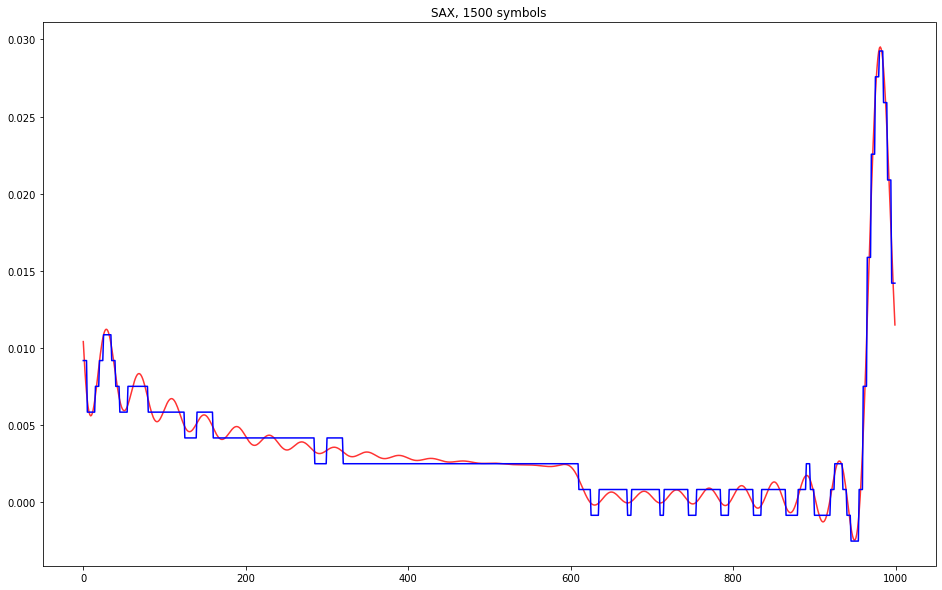

In [9]:
# Then SAX
plt.figure(figsize=(16,10))
plt.plot(sample_ts, "r-", alpha=0.8)
plt.plot(sax_dataset_inv[0].ravel(), "b-")
plt.title("SAX, %d symbols" % n_sax_symbols)

In [10]:
# Symmetric mean absolute percentage error
smape = 100*np.mean(np.absolute(sample_ts - sax_dataset_inv[0].ravel())/(np.absolute(sax_dataset_inv[0].ravel()) + np.absolute(sample_ts)))
print(smape)

16.894636760745897


# 1d-SAX transform

In [11]:
n_sax_symbols_avg = 450
n_sax_symbols_slope = 350
one_d_sax = OneD_SymbolicAggregateApproximation(
    n_segments=n_paa_segments,
    alphabet_size_avg=n_sax_symbols_avg,
    alphabet_size_slope=n_sax_symbols_slope)
transformed_data = one_d_sax.fit_transform(sample_ts)
one_d_sax_dataset_inv = one_d_sax.inverse_transform(transformed_data)

Text(0.5, 1.0, '1d-SAX, 157500 symbols(450x350)')

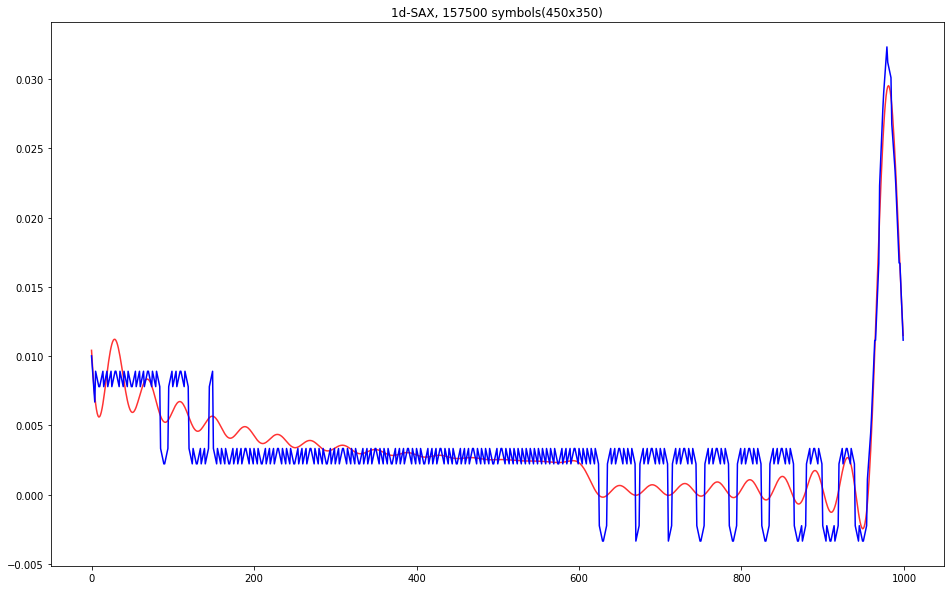

In [12]:
# 1d-SAX
plt.figure(figsize=(16,10))
plt.plot(sample_ts.ravel(), "r-", alpha=0.8)
plt.plot(one_d_sax_dataset_inv[0].ravel(), "b-")
plt.title("1d-SAX, %d symbols"
          "(%dx%d)" % (n_sax_symbols_avg * n_sax_symbols_slope,
                       n_sax_symbols_avg,
                       n_sax_symbols_slope))

In [13]:
# Symmetric mean absolute percentage error
smape = 100*np.mean(np.absolute(sample_ts - sax_dataset_inv[0].ravel())/(np.absolute(sax_dataset_inv[0].ravel()) + np.absolute(sample_ts)))
print(smape)

16.894636760745897
